# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

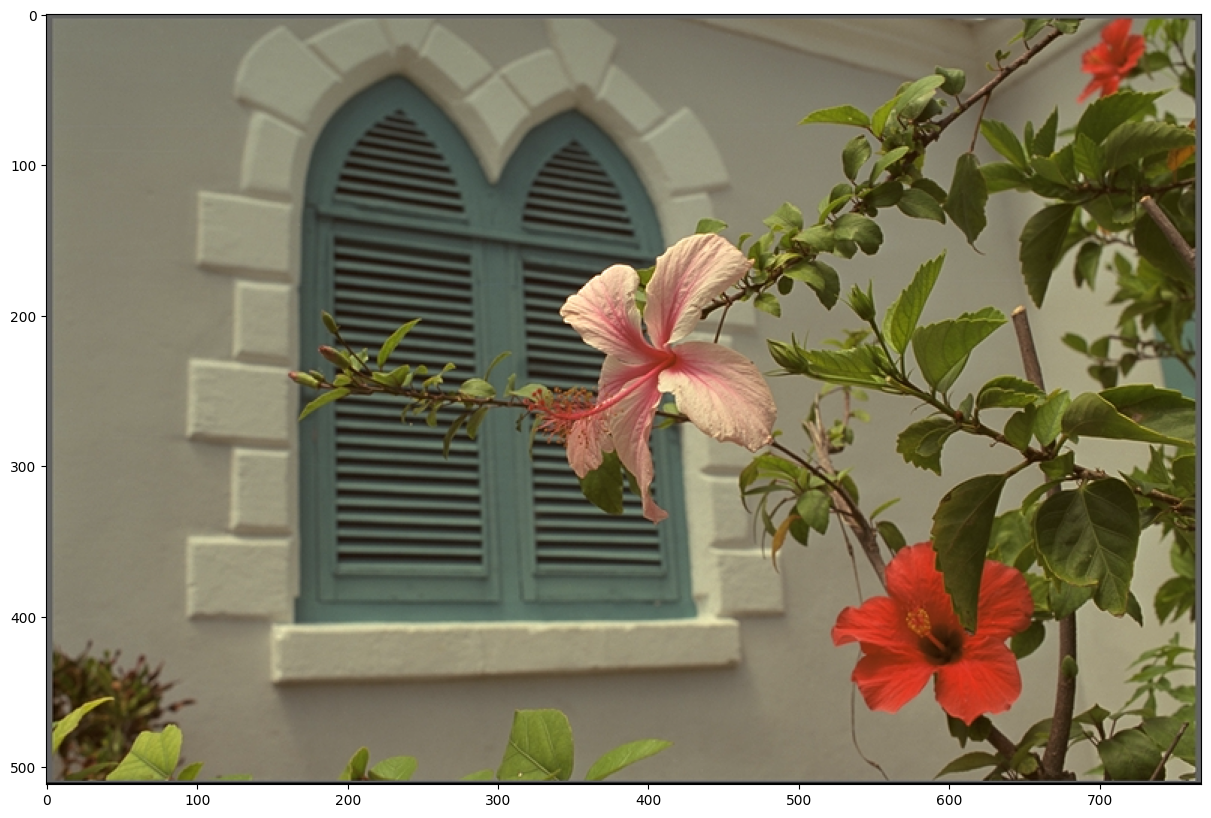

In [2]:
img = cv2.imread('../data/kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0
plt.imshow(img)

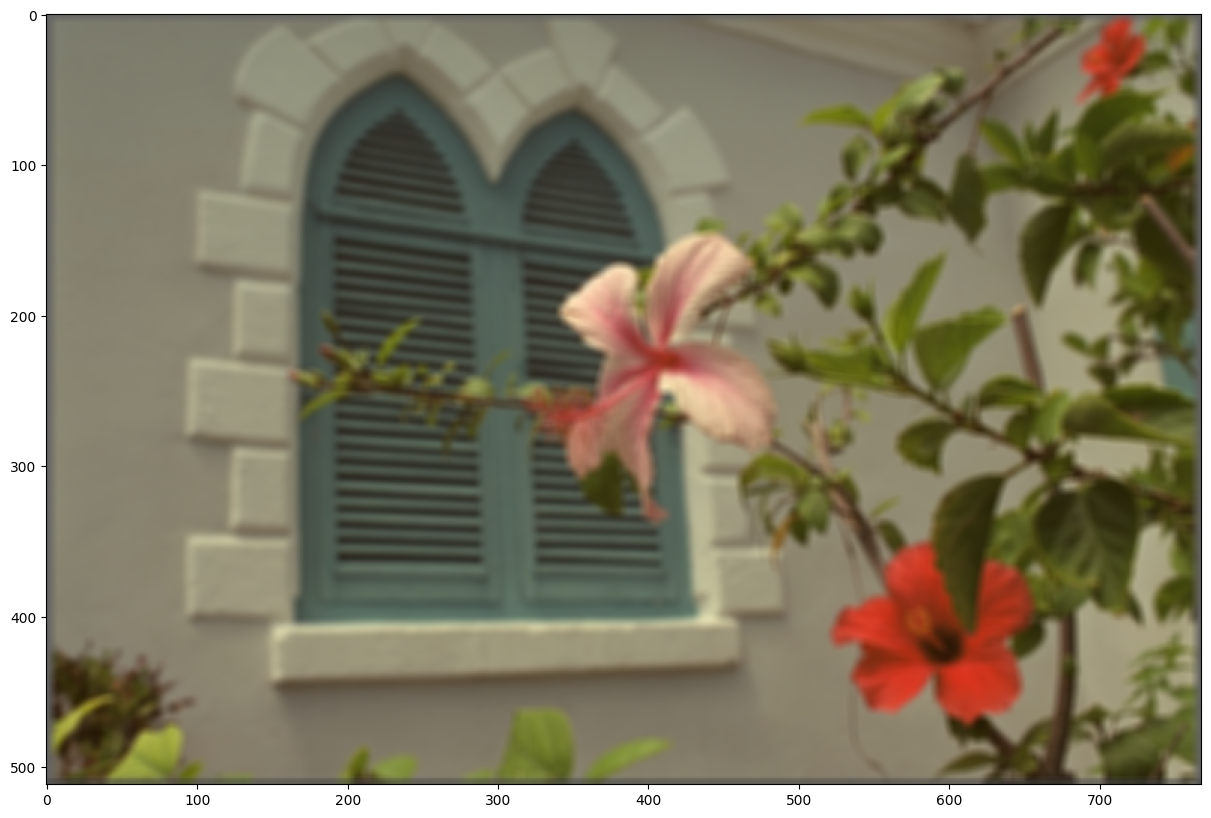

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=5)
plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: >, <matplotlib.image.AxesImage at 0x1bb980ad280>)

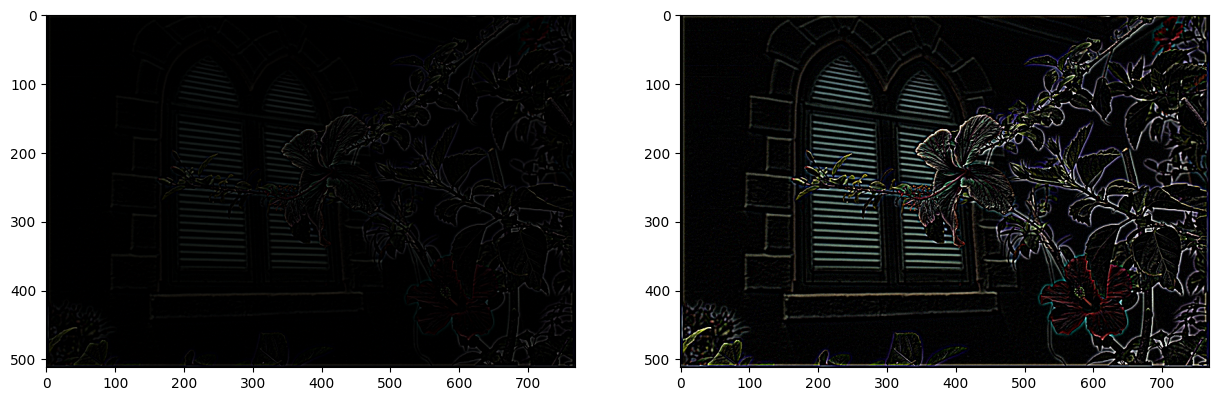

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img - unsharp
diff_1 = np.clip(diff, 0, 1) * 1
diff_5 = np.clip(diff, 0, 1) * 5
plt.subplot(121), plt.imshow(diff_1)
plt.subplot(122), plt.imshow(diff_5)

(<Axes: >, <matplotlib.image.AxesImage at 0x1bb983a3ce0>)

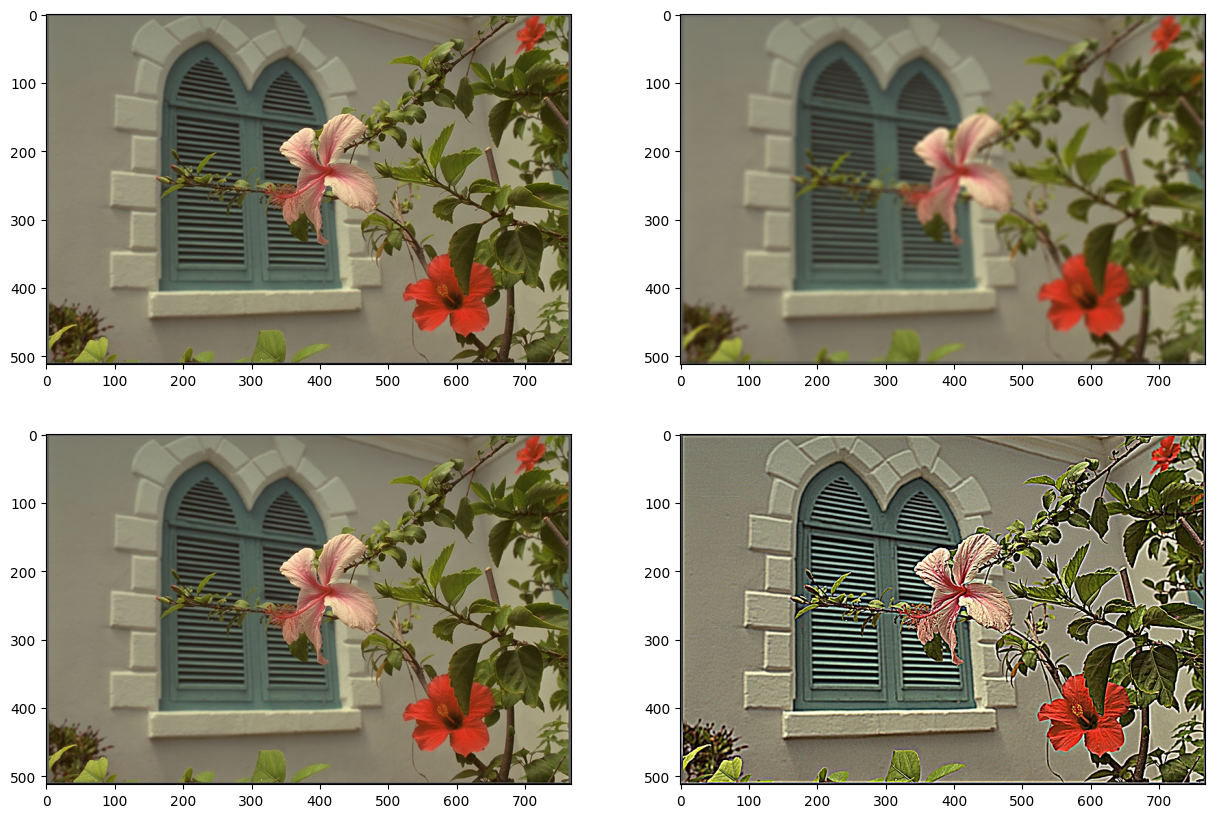

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened_1 = np.clip(unsharp + diff * 1, 0, 1.0)
sharpened_5 = np.clip(unsharp + diff * 5, 0, 1.0)
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(unsharp)
plt.subplot(223), plt.imshow(sharpened_1)
plt.subplot(224), plt.imshow(sharpened_5)

(<Axes: >, <matplotlib.image.AxesImage at 0x1bba38ed5e0>)

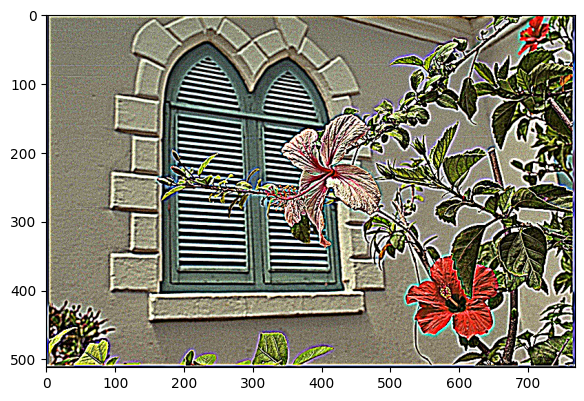

In [9]:
sharpened_15 = np.clip(unsharp + diff * 15, 0, 1.0)
plt.subplot(121), plt.imshow(sharpened_15)

### Questions
* What is a good (reasonable) value for the `amount` parameter?

  Depends what you want to achieve. If you just want to unblur the image, from my testing value around 1 works best.
 * What happens if it is too small?

   If it's too small, the image will remain more or less the same, and we will not be able to unblur it
 * What happens if it is too large?
  
   When the value grows, we will see the contours more clearly, and the contrast will be higher. However as it grows too large, the image will not look natural, it will lose original color, and contours of objects will be highlighted with another color  